<a href="https://colab.research.google.com/github/b-paramesh/Logistic_Regression_Decision_Tree_Random_Forest/blob/main/Day_20_bank_marketing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
 [[670 151]
 [ 74 405]]
Accuracy: 0.8269230769230769
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       821
           1       0.73      0.85      0.78       479

    accuracy                           0.83      1300
   macro avg       0.81      0.83      0.82      1300
weighted avg       0.84      0.83      0.83      1300



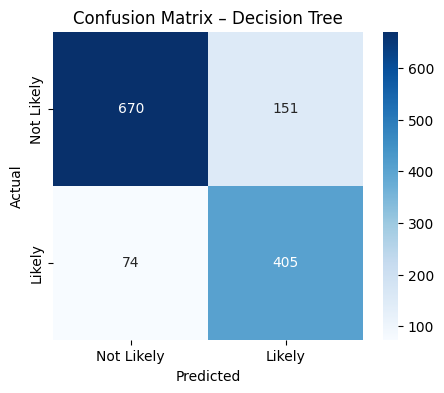

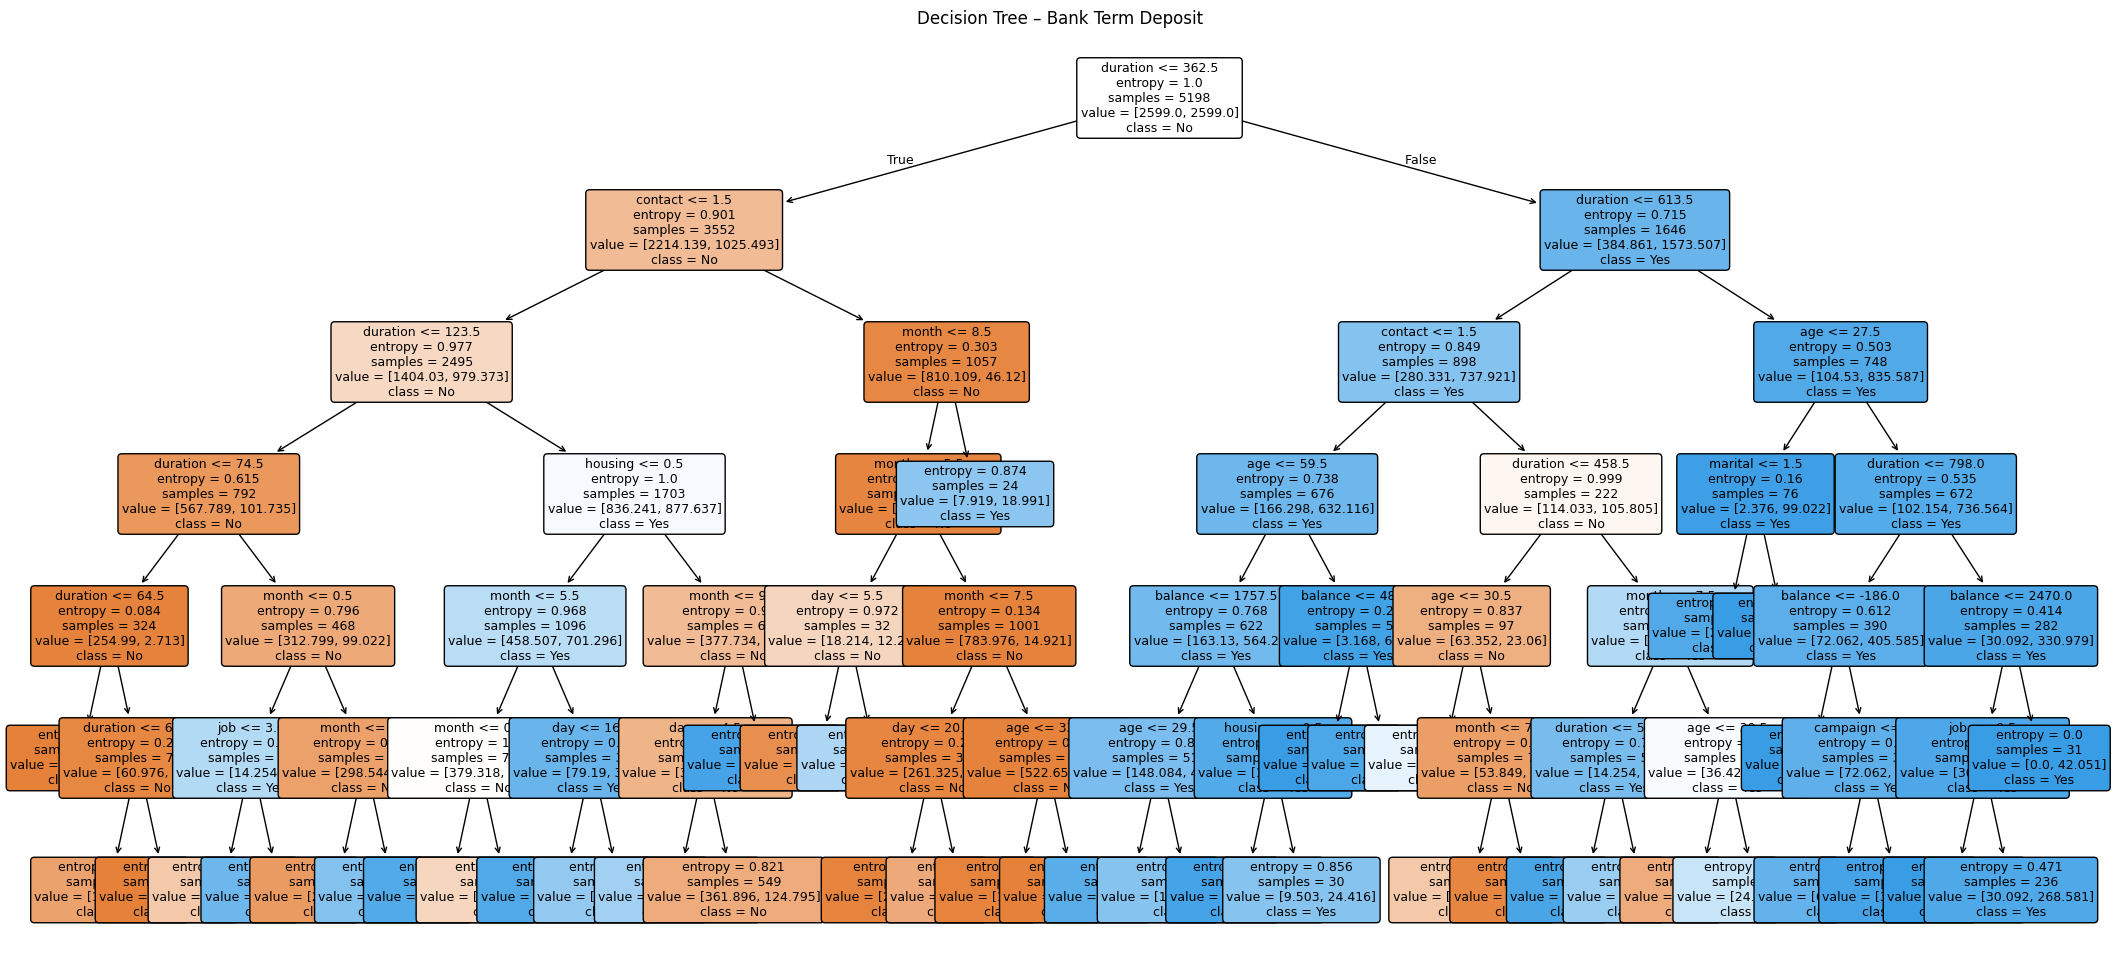


Decision Tree Rules:

|--- duration <= 362.50
|   |--- contact <= 1.50
|   |   |--- duration <= 123.50
|   |   |   |--- duration <= 74.50
|   |   |   |   |--- duration <= 64.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  64.50
|   |   |   |   |   |--- duration <= 66.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- duration >  66.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  74.50
|   |   |   |   |--- month <= 0.50
|   |   |   |   |   |--- job <= 3.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- job >  3.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- month >  0.50
|   |   |   |   |   |--- month <= 9.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- month >  9.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- duration >  123.50
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- month <= 5.50
|   |   |   |   |   |--- month <= 0.50
|   |   |   |   |   |   |--- class: 1
|

In [ ]:

# 1. IMPORT LIBRARIES


# ==============================
# 2. LOAD DATASET
# ==============================
from google.colab import drive
drive.mount("/content/drive")
path="/content/drive/MyDrive/Colab Notebooks/bank_marketing_dataset.csv"
df=pd.read_csv(path)
 # =====================================================
# COMPLETE DECISION TREE CODE
# WITH OUTLIER REMOVAL + RULE INTERPRETATION
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# ==============================
# OUTLIER REMOVAL (IQR)
# ==============================

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


# ==============================
# FEATURES & TARGET
# ==============================

X = df.drop('deposit', axis=1)
y = df['deposit']


# ==============================
# LABEL ENCODING
# ==============================

le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)


# ==============================
# TRAIN TEST SPLIT
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ==============================
# DECISION TREE MODEL
# ==============================

classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_leaf=15,
    min_samples_split=20,
    class_weight="balanced",
    random_state=0
)

classifier.fit(X_train, y_train)


# ==============================
# PREDICTION
# ==============================

y_pred = classifier.predict(X_test)


# ==============================
# EVALUATION
# ==============================

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# ==============================
# CONFUSION MATRIX HEATMAP
# ==============================

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Likely', 'Likely'],
    yticklabels=['Not Likely', 'Likely']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Decision Tree")
plt.show()


# ==============================
# DECISION TREE VISUALIZATION
# ==============================

plt.figure(figsize=(26,12))
plot_tree(
    classifier,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree – Bank Term Deposit")
plt.show()


# ==============================
# INTERPRET LEARNED RULES
# ==============================

tree_rules = export_text(classifier, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


# ==============================
# TOP ATTRIBUTE IN DECISION LOGIC
# ==============================

top_feature = X.columns[classifier.feature_importances_.argmax()]
print("\nTop Decision Attribute:", top_feature)


# ==============================
# DEPTH ANALYSIS
# ==============================

deep_tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
deep_tree.fit(X_train, y_train)

shallow_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
shallow_tree.fit(X_train, y_train)

print("\nAccuracy (Deep Tree):", accuracy_score(y_test, deep_tree.predict(X_test)))
print("Accuracy (Shallow Tree):", accuracy_score(y_test, shallow_tree.predict(X_test)))


# ==============================
# MODEL RECOMMENDATION OUTPUT
# ==============================

print("\nModel Recommendation: YES")
print("Reason: High accuracy, interpretable rules, transparent decision logic")
print("Advantage over black-box models: Easy explanation to business stakeholders")
